# Algorithmic Data Science : Week 3 (Unit 2) lab

## Investigating the run-time of sorting algorithms

We have claimed that the run-time of the insertion_sort algorithm is given by:

$$c_a n^2$$

for a fixed constant $c_a$ when the length $n$ of the list is large. This is an empirical claim, i.e., something which can be verified.  

1) Obtain code for the algorithm (from the lecture notes) and plot the run-time for lists of different lengths (via code from last week's lab). 




In [17]:
import sys
!{sys.executable} -m pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 6.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [1]:
import random
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
def insertion_sort(alist):
    for index in range(1, len(alist)):
        item=alist[index] # next value
        sofar = index-1 # previous index
        while sofar > -1 and alist[sofar] > item: # if the previous value is more than the next 
            alist[sofar+1]=alist[sofar] # set the next value as the previous value
            sofar -= 1
        alist[sofar+1]=item # set the previous value as the the next
    return alist

In [3]:
def make_rand_list(n):
    result=[]
    while n >0:
        result.append(random.randint(1,100))
        n-=1
    return result

In [4]:
def timeit(somefunc,*args,repeats=100,**kwargs):
    times=[]
    for i in range(repeats):
        starttime=time.time()
        ans=somefunc(*args,**kwargs)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
    
    mean=np.mean(times)
    stdev=np.std(times)
 
    return (mean,stdev)

In [25]:
xs=[]
ys=[]

for i in range(0,10000,100):
    print(i)
    if i == 0:
        pass
    else:
        _l = make_rand_list(i)
        (y,z)=timeit(insertion_sort, _l, repeats=20)
        xs.append(i)
        ys.append(y)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


Text(0.5, 1.0, 'Average length of time to generate lists of different lengths')

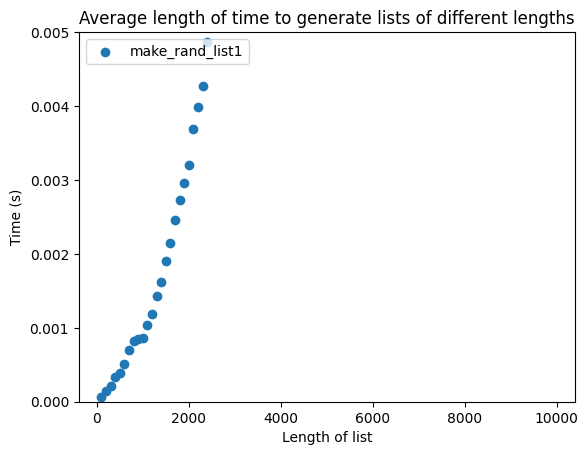

In [26]:
plt.scatter(xs,ys,label='make_rand_list1')
plt.ylim(0,0.005)  #you will need to play around with the upper limit depending on your computer
plt.legend(loc='upper left')
plt.xlabel('Length of list')
plt.ylabel('Time (s)')
plt.title('Average length of time to generate lists of different lengths')

Text(0.5, 1.0, 'Average length of time to generate lists of different lengths')

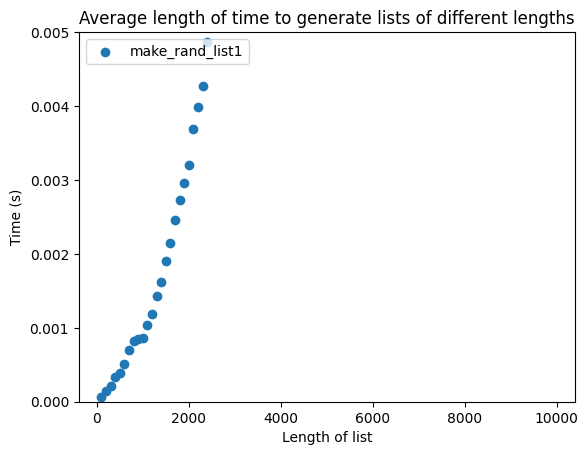

In [27]:
plt.scatter(xs,ys,label='make_rand_list1')
plt.ylim(0,0.005)  #you will need to play around with the upper limit depending on your computer
plt.legend(loc='upper left')
plt.xlabel('Length of list')
plt.ylabel('Time (s)')
plt.title('Average length of time to generate lists of different lengths')

2) How can we know we have a quadratic curve $y=c_a x^2$ for insertion_sort and not a curve of $x$ to some other power, $y=c_a x^\alpha$? For this more general case, taking logs of both sides of the equation gives:
$$\log(y) = \log(c_a) + \alpha \log(x)$$
So if we plot the log of the time taken against the log of the length of the list - assuming the function is indeed of the form $y=c_a x^\alpha$, the log-log plot will give us a straight line, and the gradient of this straight line will be $\alpha$ and the $y$ intercept will be $\log(c_a)$.

Create this log-log plot.

In [28]:
import math

log_xs = [math.log(x) for x in xs]
log_ys = [math.log(y) for y in ys]

Text(0.5, 1.0, 'Average length of time to generate lists of different lengths')

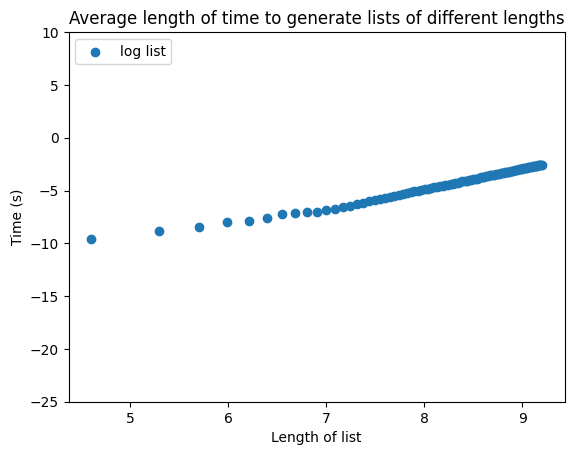

In [29]:
plt.scatter(log_xs,log_ys,label='log list')
plt.ylim(-25,10)  #you will need to play around with the upper limit depending on your computer
plt.legend(loc='upper left')
plt.xlabel('Length of list')
plt.ylabel('Time (s)')
plt.title('Average length of time to generate lists of different lengths')

# ADDITION SELF NOTES

The run time function that we have decided on is $y=c_a x^\alpha$. 

This is the power law

- $y$ is the runtime
- $x$ is the input
- $c$ is the constant coefficent
- $a$ is the exponent which termines the complexity $O(x^a)$

To fit this to a straight line you take the log (natural log) of each size

1. Original Equation:

$$\ln(y) = \ln(c_a x^\alpha)$$

2. Separate the Terms (ln(AB)=ln(A)+ln(B)):

$$\ln(y) = \ln(c_a) + \ln(x^\alpha)$$

3. Bring Down the Exponent (ln(AB)=Bln(A)):

$$\underbrace{\ln(y)}_{Y} = \underbrace{\ln(c_a)}_{A} + \underbrace{\alpha}_{B} \underbrace{\ln(x)}_{X}$$

#### The Relationship

The resulting equation is a straight line, $Y = A + B X$

where:
- Slope ($B$): The slope of your line is $\mathbf{\alpha}$ (the exponent).
- Intercept ($A$): The intercept of your line is $\mathbf{\ln(c_a)}$ (the logarithm of the constant $c_a$).

#### Calculating $c_a$

To recover the constant $c_a$ from the intercept, you must perform the inverse operation: exponentiation.If you used the natural logarithm (ln) for your transformation, the relationship is:$$\mathbf{c_a = e^{\text{Intercept}}}$$If you used the base 10 logarithm (log10​) or log, the relationship is:$$\mathbf{c_a = 10^{\text{Intercept}}}$$


#### My Code 

In my code I used math.log(x) which is a natural logarithm ($\ln$ or $\log_e$) transformation

To obtain the constant, just need to apply exponentiation using the base $\mathbf{e}$ (Euler's number)

$$\mathbf{c_a = e^{\text{Intercept}}}$$

In python this is ```c_a = math.exp(intercept)```

3) Can you estimate the constant $c_a$ for your computer? Compare your value of $c_a$ with those of other students. 

(Tip: First estimate the gradient and intercept of the log-log plot using a function from a stats library, and then use that line fit to derive $c_a$. A good choice is the *linregress* function from the library *scipy.stats*. Import the library. Then see how to run the *linregress* function by Googling *scipy.stats.linregress* and reading the documentation for this function.)



Estimated Intercept (b): -18.7397


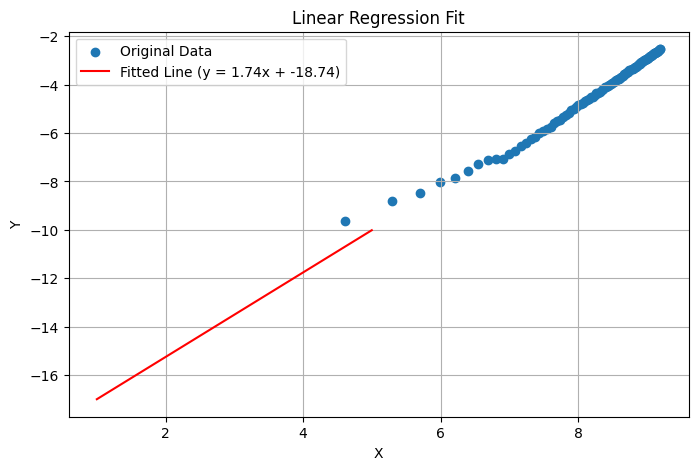

In [31]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 2. Perform Linear Regression
# It returns five values: slope, intercept, r-value, p-value, and standard error
slope, intercept, r_value, p_value, std_err = stats.linregress(log_xs, log_ys)

# 3. Output the Intercept
print(f"Estimated Intercept (b): {intercept:.4f}")

# Optional: Plot the fitted line 
plt.figure(figsize=(8, 5))
plt.scatter(log_xs, log_ys, label='Original Data')
plt.plot(x, intercept + slope*x, color='red', label=f'Fitted Line (y = {slope:.2f}x + {intercept:.2f})')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()

In [32]:
i_const = math.exp(intercept)

readable_format_fstring = f"{i_const:.18f}"
print(f"Readable f-string: {readable_format_fstring}")

Readable f-string: 0.000000007268786113


4) What value do you get for $\alpha$? If you find $\alpha$ is not that close to 2, it's because the lists you're considering are not long enough for the time complexity to be behaving the way it does asymptotically for large $n$. See what happens to $\alpha$ if you do a plot using longer lists. Do you end up eventually with a value close to 2?

In [36]:
a_const = math.exp(slope)

readable_format_fstring = f"{a_const:.18f}"
print(f"Readable f-string: {readable_format_fstring}")

Readable f-string: 5.725834751420338264


5) Recall that the official time complexity should be derived using the worst case scenario. Did you think to use lists that lead to the worst case scenario? If you did plots just based on completely random lists, then you were obtaining average scenarios. Can you do the worst case scenario and the best case scenario? How do these and the average scenario differ?

- Best case scenario for insertion sort is just a list which is already sorted which is O(n)
- Worst case scenario is a list in reverse order as each element need to traverse the full list boundry that they have availble to them

In [44]:
w_xs=[]
w_ys=[]

for i in range(0,5000,100):
    # print(i)
    if i == 0:
        pass
    else:
        _l = make_rand_list(i)
        __l = insertion_sort(_l)
        __l.reverse()
        (y,z)=timeit(insertion_sort, __l, repeats=20)
        w_xs.append(i)
        w_ys.append(y)

6) (Optional.) How accurate can you make your estimate of $c_a$?  What is the standard deviation / error in your measurements? (Tip: The linear regression function you used has the ability to give you the standard error for the estimates of the slope and intercept.)



7) Repeat your experiments while your computer is heavily loaded (e.g. running some video processing in the background), and compare the results.

(Optional.) Now repeat the whole exercise for the merge_sort algorithm, which we theoretically expect to run in

$$c_bn\log(n)$$

for a fixed constant $c_b$ when the length of the list is large. In this case we cannot (sensibly) log both sides.  However we can use a transformation $x=n \log n$.  If we plot $y$=time-taken against this $x$ then we should get a straight line graph with gradient $c_b$ and $y$-intercept $\approx$ 0.